In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('weatherHistory.csv')

In [3]:
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
data.drop(['Formatted Date','Summary','Daily Summary','Loud Cover'],axis=1,inplace = True)

In [5]:
data['Precip Type'].replace({'rain':1,'snow':0}, inplace=True)

In [6]:
data.dropna(inplace=True)

In [7]:
X = data.drop(columns=['Precip Type','Humidity','Wind Speed (km/h)','Wind Bearing (degrees)','Visibility (km)',
                      'Pressure (millibars)'])

In [8]:
X = pd.concat([pd.Series(1, index=X.index, name='00'), X], axis=1)
X.head()

,00,Temperature (C),Apparent Temperature (C)
0,1,9.472222,7.388889
1,1,9.355556,7.227778
2,1,9.377778,9.377778
3,1,8.288889,5.944444
4,1,8.755556,6.977778


In [9]:
Y = X['Temperature (C)']
X.drop(columns = 'Temperature (C)',inplace=True)
Y.head()

0    9.472222
1    9.355556
2    9.377778
3    8.288889
4    8.755556
Name: Temperature (C), dtype: float64

In [10]:
X['h1'] = X['Apparent Temperature (C)']**2
X['h2'] = X['Apparent Temperature (C)']**3
X.head()

,00,Apparent Temperature (C),h1,h2
0,1,7.388889,54.595679,403.401406
1,1,7.227778,52.240772,377.584688
2,1,9.377778,87.942716,824.707248
3,1,5.944444,35.336420,210.055384
4,1,6.977778,48.689383,339.743693


In [11]:
X = X/X.max()
X
train_X = np.array(X[:30])
train_Y = np.array(Y[:30])
test_X = np.array(X[30:60])
test_Y = np.array(Y[30:60])
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(30, 4)
(30,)
(30, 4)
(30,)


In [12]:
train_Y = train_Y.reshape(train_X.shape[0], 1)
test_Y = test_Y.reshape(test_Y.shape[0], 1)
m = train_X.shape[0]
n = train_X.shape[1]
print(n,m)

4 30


In [13]:
m = len(X[:30])
m

30

In [14]:
def hypothesis(x, theta):
    y1 = np.dot(x,theta)
    return np.sum(y1, axis=1)

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)

def gradientDescent(x, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(x, theta)
        for c in range(0, len(x.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* x.iloc[:, c])/m
        j = cost(x, y, theta)
        J.append(j)
        k += 1
    return J, theta

theta = np.zeros((len(X.columns),1))
J, theta = gradientDescent(X[:30],Y[:30],theta, 0.05, 700)

In [15]:
y_hat = hypothesis(test_X, theta)
print(J[-5:])

[0.8057965241047429, 0.8051364222456852, 0.8044768899195269, 0.8038179266348074, 0.8031595319004909]


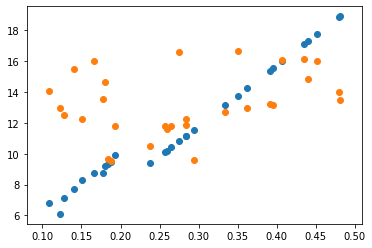

In [354]:
plt.figure()
plt.scatter(x=X['Apparent Temperature (C)'][:30],y= Y[:30])           
plt.scatter(x=X['Apparent Temperature (C)'][:len(y_hat)], y=y_hat)
plt.show()

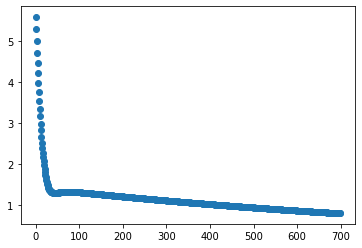

In [355]:
plt.figure()
plt.scatter(x=list(range(0, 700)), y=J)
plt.show()

In [92]:
class PolynomailRegression() : 
    def __init__( self, degree, learning_rate, iterations ): 
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    # function to tranform X 
    def transform( self, X ) :
        # initialize X_transform
        X_transform = np.ones((self.m,1))
        j = 0
        for j in range( self.degree + 1 ): 
            if j != 0 :
                x_pow = np.power( X, j ) 
                # append x_pow to X_transform
                X_transform = np.append( X_transform, x_pow.reshape( -1, 1 ), axis = 1 )
        return X_transform 
    
    # function to normalize X_tranform 
    def normalize( self, X ) :  
        X[:, 1:] = ( X[:, 1:] - np.mean( X[:, 1:], axis = 0 ) ) / np.std( X[:, 1:], axis = 0 )    
        return X 
    
    # model training 
    def fit( self, X, Y ) : 
        self.X = X       
        self.Y = Y 
        self.m, self.n = self.X.shape 
        # weight initialization 
        self.W = np.zeros( self.degree + 1 ) 
        # tranform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n 
        X_transform = self.transform( self.X ) 
        # normalize X_transform 
        X_normalize = self.normalize( X_transform ) 
        # gradient descent learning 
        for i in range( self.iterations ) : 
            h = self.predict( self.X )
            error = h - self.Y
            # update weights
            self.W = self.W - self.learning_rate * ( 1 / self.m ) * np.dot( X_normalize.T, error )
        return self
    
    #predict    
    def predict( self, X ) :
        # tranform X for polynomial  h( x ) = w0 * x^0 + w1 * x^1 + w2 * x^2 + ........+ wn * x^n 
        X_transform = self.transform( X )
        X_normalize = self.normalize( X_transform ) 
        return np.dot( X_transform, self.W ) 

In [93]:
model = PolynomailRegression( degree = 2, learning_rate = 0.01, iterations = 500 )

In [94]:
train_Y.reshape((3000,1))
model.fit(z, train_Y )

ValueError: operands could not be broadcast together with shapes (3,) (3,3000) 

In [95]:
Y_pred = model.predict( z )

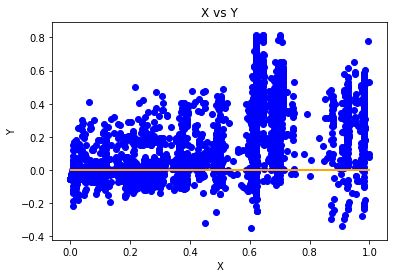

In [96]:
plt.scatter( z, train_Y, color = 'blue' ) 
plt.plot( z, Y_pred, color = 'orange' ) 
plt.title( 'X vs Y' )       
plt.xlabel( 'X' )       
plt.ylabel( 'Y' )       
plt.show()